# 1. 필요 패키지 호출 및 초기화

In [1]:
import pyecharts
import matplotlib.pyplot as plt
import numpy as np

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "C:\Users\LG\Anaconda3\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib as font_manager
from matplotlib import rcParams
from pyecharts import Pie
import pandas as pd
import datetime
from matplotlib import font_manager, rc

* matplotlib 그래프 크기 초기화

In [3]:
plt.rcParams["figure.figsize"] = (15,10)

* 그래프에서 한글 표시를 위한 폰트 초기화

In [4]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 2. 데이터 시각화(그래프 생성)

### - 고객의 남녀 성비 및 연령층

In [5]:
age_gender_group = pd.read_csv("age_gender_group.csv")

In [6]:
age_gender_group

,Unnamed: 0,CLNT_GENDER,CLNT_AGE,COUNT
0,0,F,10,3007
1,1,F,20,82269
2,2,F,30,271712
3,3,F,40,180398
4,4,F,50,28881
5,5,F,60,3784
6,6,F,70,542
7,7,F,80,23
8,8,M,10,800
9,9,M,20,13028


In [7]:
age_array = age_gender_group["CLNT_AGE"][age_gender_group["CLNT_GENDER"] == "F"]
female_count_array = age_gender_group["COUNT"][age_gender_group["CLNT_GENDER"] == "F"]
male_count_array = age_gender_group["COUNT"][age_gender_group["CLNT_GENDER"] == "M"]

temp_age_array = []
for k in age_array:
    temp_age_array.append(str(k) + "대")
    
age_array = temp_age_array
# age_array는 기존의 CLNT_ATE = {10,20,30,40,..} 형식으로 되어있던 데이터를
# {"10대","20대","30대","40대" ...}의 형식으로 바꾸기 위하여 반복문으로 생성한 리스트

In [8]:
bar = pyecharts.Bar("고객 연령별 성비 분포")
bar.add("여성", age_array, female_count_array, mark_line=["average"], is_label_show=True)
bar.add("남성", age_array, male_count_array, mark_line=["average"], is_label_show=True)
bar.height = 500
bar.width = 900
bar

### - 브랜드 인기순위 TOP10

In [9]:
brand_top = pd.read_csv("BRAND_TOP10.csv")

In [10]:
brand_top

,PD_BRA_NM,BUY_CT
0,아디다스(의류),26648.0
1,가쯔,26795.0
2,입생로랑,27439.0
3,크록스,31019.0
4,탑텐,33060.0
5,에이치커넥트,33923.0
6,한샘,35576.0
7,정관장,41691.0
8,나이키,50588.0
9,지오다노,78556.0


In [11]:
brand_array = brand_top["PD_BRA_NM"]
brand_count_array = brand_top["BUY_CT"]

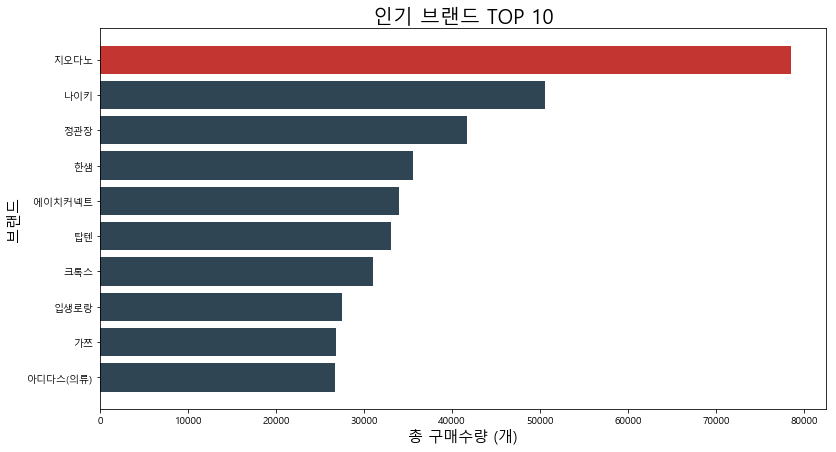

In [12]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(brand_array[0:9], brand_count_array[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(brand_array[9], brand_count_array[9], label = "Buy Count", color = "#C23531")
plt.title("인기 브랜드 TOP 10", size = 20)
plt.ylabel("브랜드", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 10,20대 층의 인기 대분류 TOP10

In [13]:
clac_nm_1020_top = pd.read_csv("CLAC1_1020_TOP10.csv")

In [14]:
clac_nm_1020_top

,CLAC1_NM,BUY_CT
0,건강식품,8317
1,시즌스포츠,8481
2,원예/애완,10248
3,퍼스널케어,11181
4,속옷/양말/홈웨어,27065
5,남성의류,34192
6,여성의류,34649
7,패션잡화,38317
8,스포츠패션,46543
9,화장품/뷰티케어,90028


In [15]:
clac1_1020_nm = clac_nm_1020_top["CLAC1_NM"]
count_1020 = clac_nm_1020_top["BUY_CT"]

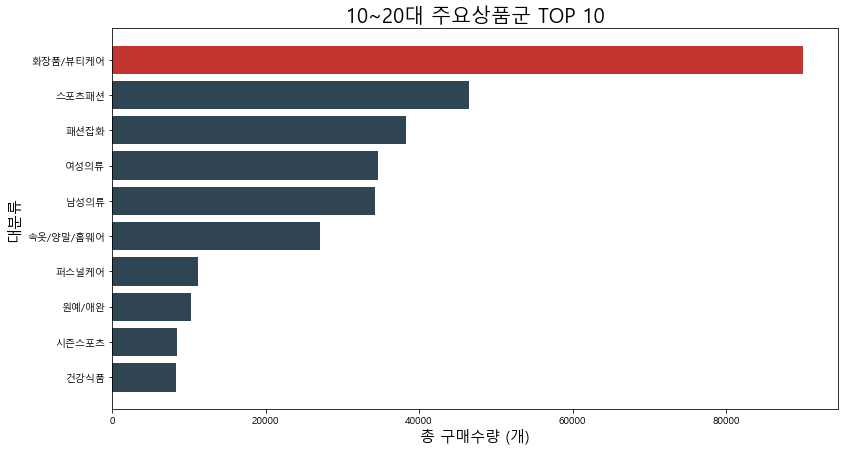

In [16]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(clac1_1020_nm[0:9], count_1020[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(clac1_1020_nm[9], count_1020[9], label = "Buy Count", color = "#C23531")
plt.title("10~20대 주요상품군 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 30,40대 층의 인기 대분류 TOP10

In [17]:
clac_nm_3040_top = pd.read_csv("CLAC1_3040_TOP10.csv")

In [18]:
clac1_3040_nm = clac_nm_3040_top["CLAC1_NM"]
count_3040 = clac_nm_3040_top["BUY_CT"]

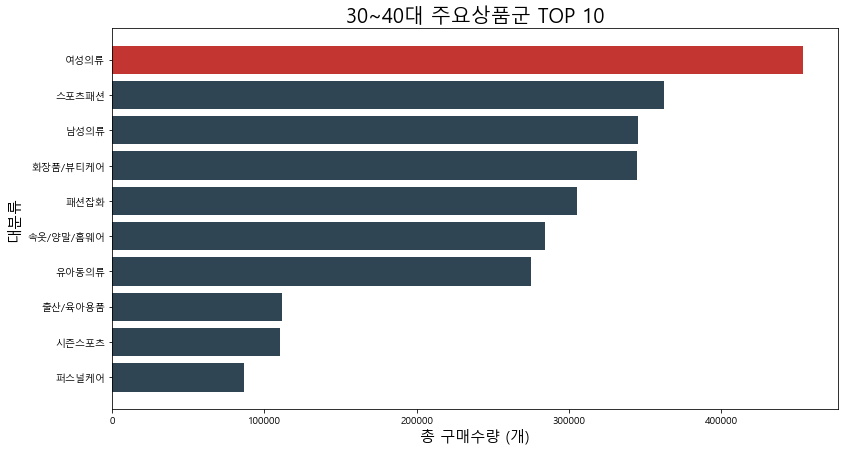

In [19]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(clac1_3040_nm[0:9], count_3040[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(clac1_3040_nm[9], count_3040[9], label = "Buy Count", color = "#C23531")
plt.title("30~40대 주요상품군 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 50,60대 층의 인기 대분류 TOP10

In [20]:
clac_nm_5060_top = pd.read_csv("CLAC1_5060_TOP10.csv")

In [21]:
clac1_5060_nm = clac_nm_5060_top["CLAC1_NM"]
count_5060 = clac_nm_5060_top["BUY_CT"]

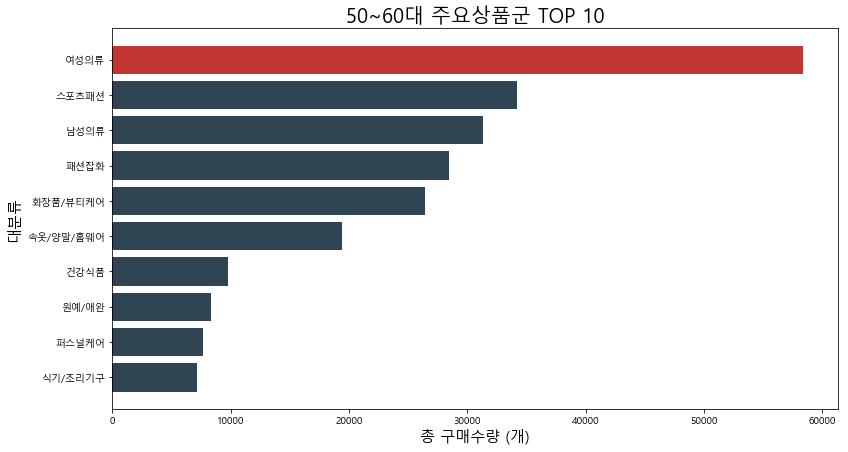

In [22]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(clac1_5060_nm[0:9], count_5060[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(clac1_5060_nm[9], count_5060[9], label = "Buy Count", color = "#C23531")
plt.title("50~60대 주요상품군 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 70,80대 층의 인기 대분류 TOP10

In [23]:
clac_nm_7080_top = pd.read_csv("CLAC1_7080_TOP10.csv")

In [24]:
clac1_7080_nm = clac_nm_7080_top["CLAC1_NM"]
count_7080 = clac_nm_7080_top["BUY_CT"]

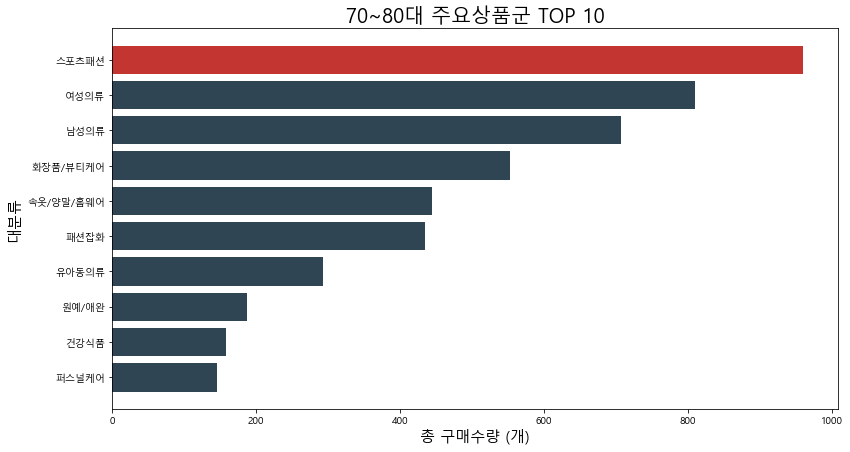

In [25]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(clac1_7080_nm[0:9], count_7080[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(clac1_7080_nm[9], count_7080[9], label = "Buy Count", color = "#C23531")
plt.title("70~80대 주요상품군 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 구매 수량에 따른 대분류 TOP10

In [26]:
clac_top10 = pd.read_csv("CLAC1_TOP10.csv")

In [27]:
top_clac_nm_array = clac_top10["CLAC1_NM"]
top_count_array = clac_top10["BUY_COUNT"]

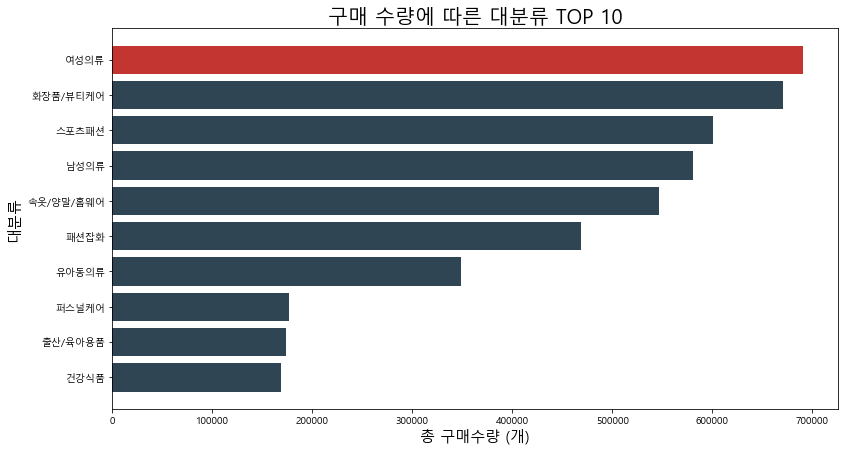

In [28]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(top_clac_nm_array[0:9], top_count_array[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(top_clac_nm_array[9], top_count_array[9], label = "Buy Count", color = "#C23531")
plt.title("구매 수량에 따른 대분류 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매수량 (개)", size = 15)
plt.show()

### - 월별 총 구매수량 및 총 구매금액

In [29]:
monthly_purchase = pd.read_csv("monthly_purchase.csv")

In [30]:
monthly_purchase

,Unnamed: 0,SESS_MONTH,COUNT,PRICE
0,0,4,903765,3804295
1,1,5,948295,4452588
2,2,6,925036,5630790
3,3,7,862453,4179100
4,4,8,699428,3178120
5,5,9,685929,2386900


In [31]:
count_array = monthly_purchase["COUNT"]
price_array = monthly_purchase["PRICE"]

In [32]:
attr = ["Apr", "May", "Jun", "Jul", "Aug", "Sep"]
bar = pyecharts.Bar("월별 판매 통계량", "월별 판매 횟수와 판매 총액")
bar.add("판매 횟수", attr, count_array, mark_line=["average"])
bar.add("판매 총액", attr, price_array, mark_line=["average"], mark_point=["max", "min"])
bar.height = 500
bar.width = 900
bar

### - 성별에 따른 월별 구매횟수

In [33]:
month_gender = pd.read_csv("p_mon_gen.csv")

In [34]:
month_gender = month_gender.sort_values("CLNT_GENDER")

In [35]:
month_gender

,Unnamed: 0,SESS_DT,CLNT_GENDER,count(CLNT_ID)
1,1,1804,F,616392
3,3,1805,F,656177
5,4,1806,F,648537
7,6,1807,F,595610
9,8,1808,F,490172
11,10,1809,F,484634
0,0,1804,M,90806
2,2,1805,M,92646
4,5,1806,M,90454
6,7,1807,M,86533


In [36]:
female_count_array = month_gender["count(CLNT_ID)"][0:6]
male_count_array = month_gender["count(CLNT_ID)"][6:12]


In [37]:
female_count_array

1     616392
3     656177
5     648537
7     595610
9     490172
11    484634
Name: count(CLNT_ID), dtype: int64

In [38]:
attr = ["Apr", "May", "Jun", "Jul", "Aug", "Sep"]
bar = pyecharts.Bar("성별,월별 구매현황", "성별과 월에 따른 구매 추이")
bar.add("여자", attr, female_count_array, mark_line=["average"])
bar.add("남자", attr, male_count_array, mark_line=["average"])
bar.height = 500
bar.width = 700
bar

## - 고객 사용기기 분포

In [45]:
dvc_num = pd.read_csv("DVC_Num.csv")

In [46]:
dvc_num

,Unnamed: 0,DVC,count(DVC)
0,0,desktop,235064
1,1,mobile,683564
2,2,tablet,4497


In [47]:
label = dvc_num["DVC"]
data = dvc_num["count(DVC)"]

In [48]:
pie = Pie("고객 사용기기 분포")
pie.add("B", label, data, is_randome=True, radius=[30, 75], is_legend_show=True, is_label_show=True)
pie

### - 상품 구매고객 유입경로(외부데이터)

In [49]:
customer_behavior = pd.read_csv("customer_behavior.csv")

In [50]:
customer_behavior

,종류,2018
0,배너 광고,4.1
1,팝업 광고,3.4
2,동영상 광고 (동영상 재생 전후 등),5.3
3,검색어/키워드 광고,6.1
4,"SNS(페이스북, 인스타그램, 트위터 등) 광고/홍보",11.1
5,"SNS, 블로그 사용자 후기 및 전문가 리뷰",21.0
6,"포털 카페 및 커뮤니티(네이버, 다음 등)",15.4
7,가격비교사이트 및 제품 관련 전문사이트,19.3
8,이메일 광고/뉴스레터 등,3.4
9,샘플/구매 사은품,29.1


In [51]:
type_array = customer_behavior["종류"][0:12]
value_array = customer_behavior["2018"][0:12]

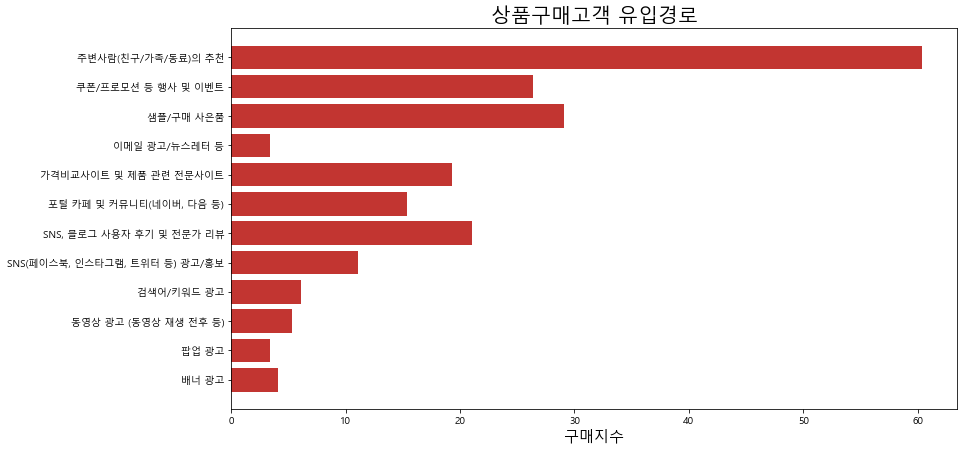

In [52]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(type_array, value_array, label = "Buy Count", color = "#C23531")
plt.title("상품구매고객 유입경로", size = 20)
plt.xlabel("구매지수", size = 15)
plt.show()

### 총 구매금액 기준 대분류 TOP10

* 구매금액 기준 대분류 TOP10을 주요 상품군이라 생각함

In [53]:
main_product = pd.read_csv("Main_Product.csv", encoding = "utf-8")

In [54]:
main_product = main_product.sort_values(["SUM_PD_AM"],ascending = True)
main_product

,Unnamed: 0,CLAC1_NM,COUNT,AVG_HITS,SUM_PD_AM,SUM_PD_CT
9,9,냉장/세탁가전,4834,72.5,5198983240,4861
8,8,건강식품,95194,68.0,6389955380,122867
7,7,생활/주방가전,32957,70.1,7800062020,34251
6,6,유아동의류,282643,117.2,8221223940,288458
5,5,가구,33990,67.5,9147327640,41719
4,4,남성의류,411407,103.6,13663131150,429489
3,3,화장품/뷰티케어,461686,71.2,21641850740,512522
2,2,스포츠패션,444117,92.3,22979026310,459423
1,1,여성의류,547506,103.5,27804838980,555161
0,0,패션잡화,372320,83.5,36945853350,385716


In [55]:
clac_nm = main_product["CLAC1_NM"]
sum_pd_am = (main_product["SUM_PD_AM"])

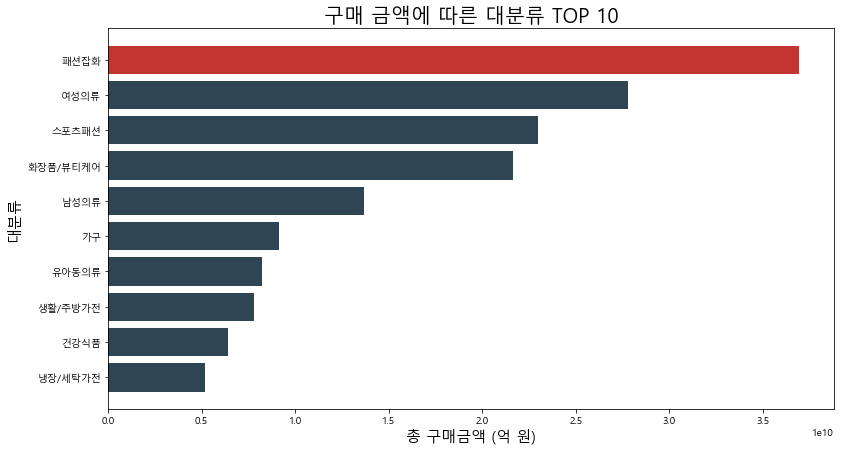

In [56]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(clac_nm[0:9], sum_pd_am[0:9], label = "Buy Count", color = "#2F4554")
plt.bar = ax.barh(clac_nm[0], sum_pd_am[0], label = "Buy Count", color = "#C23531")
plt.title("구매 금액에 따른 대분류 TOP 10", size = 20)
plt.ylabel("대분류", size = 15)
plt.xlabel("총 구매금액 (억 원)", size = 15)
plt.show()

### - 연령층, 성별에 따른 주요 상품군(매출 TOP10) 구매 통계

In [57]:
main_product_gender_age = pd.read_csv("Main_Product_Gender_Age.csv",encoding = "utf-8")

In [58]:
main_product_gender_age

,Unnamed: 0,CLAC1_NM,CLNT_GENDER,CLNT_AGE,COUNT,AVG_HITS,SUM_PD_AM,SUM_PD_CT
0,0,가구,F,10,15,43.3,2035300,17
1,1,가구,F,20,2495,63.4,520178700,2741
2,2,가구,F,30,13531,64.8,3349369440,16331
3,3,가구,F,40,10151,70.9,2765260100,12704
4,4,가구,F,50,1961,73.3,644290750,2577
5,5,가구,F,60,232,72.6,95748970,265
6,6,가구,F,70,35,63.2,6547250,40
7,7,가구,F,80,4,90.0,141000,6
8,8,가구,M,10,5,42.8,621850,5
9,9,가구,M,20,476,67.6,115115280,559


In [59]:
main_product_gender_age = main_product_gender_age.set_index(["CLAC1_NM"])

### - "가구" 대분류 구매고객 분포

In [60]:
top1_main_product = main_product_gender_age.loc["가구"]

In [61]:
top1_main_product["CLAC1_NM"] = top1_main_product.index.values
top1_main_product = top1_main_product.reset_index(drop = True)
top1_main_product

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CLNT_GENDER,CLNT_AGE,COUNT,AVG_HITS,SUM_PD_AM,SUM_PD_CT,CLAC1_NM
0,0,F,10,15,43.3,2035300,17,가구
1,1,F,20,2495,63.4,520178700,2741,가구
2,2,F,30,13531,64.8,3349369440,16331,가구
3,3,F,40,10151,70.9,2765260100,12704,가구
4,4,F,50,1961,73.3,644290750,2577,가구
5,5,F,60,232,72.6,95748970,265,가구
6,6,F,70,35,63.2,6547250,40,가구
7,7,F,80,4,90.0,141000,6,가구
8,8,M,10,5,42.8,621850,5,가구
9,9,M,20,476,67.6,115115280,559,가구


In [62]:
age_array = []
for k in top1_main_product["CLNT_AGE"][0:8]:
    age_array.append(str(k) + "대")
age_array

['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']

In [63]:
top1_f_sum_am = [0,0,0,0,0,0,0,0]
top1_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top1_f_sum_am[k] = round((top1_main_product["SUM_PD_AM"][k]/100000000),3)
        top1_m_sum_am[k] = round((top1_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [64]:
bar = pyecharts.Bar("'가구' 구매 통계량","성별과 연령층에 따른 가구 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top1_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top1_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "건강식품" 대분류 구매고객 분포

In [65]:
top2_main_product = main_product_gender_age.loc["건강식품"]

In [66]:
top2_main_product["CLAC1_NM"] = top2_main_product.index.values
top2_main_product = top2_main_product.reset_index(drop = True)
top2_main_product

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,CLNT_GENDER,CLNT_AGE,COUNT,AVG_HITS,SUM_PD_AM,SUM_PD_CT,CLAC1_NM
0,15,F,10,157,53.3,3948990,193,건강식품
1,16,F,20,7227,64.8,423572950,9350,건강식품
2,17,F,30,35207,66.7,2321774040,44867,건강식품
3,18,F,40,30649,67.8,2012154720,39324,건강식품
4,19,F,50,6917,70.0,502770300,8848,건강식품
5,20,F,60,830,71.2,62550790,1027,건강식품
6,21,F,70,97,54.2,6235480,119,건강식품
7,22,M,10,16,52.8,660050,21,건강식품
8,23,M,20,917,60.2,56803980,1596,건강식품
9,24,M,30,5247,68.2,382381670,7305,건강식품


In [67]:
top2_f_sum_am = [0,0,0,0,0,0,0,0]
top2_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top2_f_sum_am[k] = round((top2_main_product["SUM_PD_AM"][k]/100000000),3)
        top2_m_sum_am[k] = round((top2_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [68]:
bar = pyecharts.Bar("'건강식품' 구매 통계량","성별과 연령층에 따른 건강식품 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top2_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top2_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "남성의류" 대분류 구매고객 분포

In [69]:
top3_main_product = main_product_gender_age.loc["남성의류"]

In [70]:
top3_main_product["CLAC1_NM"] = top3_main_product.index.values
top3_main_product = top3_main_product.reset_index(drop = True)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
top3_f_sum_am = [0,0,0,0,0,0,0,0]
top3_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top3_f_sum_am[k] = round((top3_main_product["SUM_PD_AM"][k]/100000000),3)
        top3_m_sum_am[k] = round((top3_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [72]:
bar = pyecharts.Bar("'남성의류' 구매 통계량","성별과 연령층에 따른 남성의류 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top3_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top3_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "냉장/세탁가정" 대분류 구매고객 분포

In [73]:
top4_main_product = main_product_gender_age.loc["냉장/세탁가전"]

In [74]:
top4_main_product["CLAC1_NM"] = top4_main_product.index.values
top4_main_product.reset_index(drop = True, inplace = True)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
top4_f_sum_am = [0,0,0,0,0,0,0,0]
top4_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top4_f_sum_am[k] = round((top4_main_product["SUM_PD_AM"][k]/100000000),3)
        top4_m_sum_am[k] = round((top4_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [76]:
bar = pyecharts.Bar("'냉장/세탁가전' 구매 통계량","성별과 연령층에 따른 냉장/세탁가전 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top4_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top4_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "생활/주방가전" 대분류 구매고객 분포

In [77]:
top5_main_product = main_product_gender_age.loc["생활/주방가전"]

In [78]:
top5_main_product["CLAC1_NM"] = top5_main_product.index.values
top5_main_product.reset_index(drop = True, inplace = True)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
top5_f_sum_am = [0,0,0,0,0,0,0,0]
top5_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top5_f_sum_am[k] = round((top5_main_product["SUM_PD_AM"][k]/100000000),3)
        top5_m_sum_am[k] = round((top5_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [80]:
bar = pyecharts.Bar("'생활/주방가전' 구매 통계량","성별과 연령층에 따른 생활/주방가전 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top5_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top5_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

###  - "스포츠패션" 대분류 구매고객 분포

In [81]:
top6_main_product = main_product_gender_age.loc["스포츠패션"]

In [82]:
top6_main_product["CLAC1_NM"] = top6_main_product.index.values
top6_main_product.reset_index(drop = True, inplace = True)

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
top6_f_sum_am = [0,0,0,0,0,0,0,0]
top6_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top6_f_sum_am[k] = round((top6_main_product["SUM_PD_AM"][k]/100000000),3)
        top6_m_sum_am[k] = round((top6_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

In [84]:
bar = pyecharts.Bar("'스포츠패션' 구매 통계량","성별과 연령층에 따른 스포츠패션 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top6_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top6_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "여성의류" 대분류 구매고객 분포

In [85]:
top7_main_product = main_product_gender_age.loc["여성의류"]
top7_main_product["CLAC1_NM"] = top7_main_product.index.values
top7_main_product.reset_index(drop = True, inplace = True)

top7_f_sum_am = [0,0,0,0,0,0,0,0]
top7_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top7_f_sum_am[k] = round((top7_main_product["SUM_PD_AM"][k]/100000000),3)
        top7_m_sum_am[k] = round((top7_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [86]:
bar = pyecharts.Bar("'여성의류' 구매 통계량","성별과 연령층에 따른 여성의류 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top7_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top7_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "유아동의류" 대분류 구매고객 분포

In [87]:
top8_main_product = main_product_gender_age.loc["유아동의류"]
top8_main_product["CLAC1_NM"] = top8_main_product.index.values
top8_main_product.reset_index(drop = True, inplace = True)

top8_f_sum_am = [0,0,0,0,0,0,0,0]
top8_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top8_f_sum_am[k] = round((top8_main_product["SUM_PD_AM"][k]/100000000),3)
        top8_m_sum_am[k] = round((top8_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
bar = pyecharts.Bar("'유아동의류' 구매 통계량","성별과 연령층에 따른 유아동의류 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top8_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top8_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "패션잡화" 대분류 구매고객 분포

In [89]:
top9_main_product = main_product_gender_age.loc["패션잡화"]
top9_main_product["CLAC1_NM"] = top9_main_product.index.values
top9_main_product.reset_index(drop = True, inplace = True)

top9_f_sum_am = [0,0,0,0,0,0,0,0]
top9_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top9_f_sum_am[k] = round((top9_main_product["SUM_PD_AM"][k]/100000000),3)
        top9_m_sum_am[k] = round((top9_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [90]:
bar = pyecharts.Bar("'패션잡화' 구매 통계량","성별과 연령층에 따른 패션잡화 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top9_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top9_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar

### - "화장품/뷰티케어" 대분류 구매고객 분포

In [94]:
top10_main_product = main_product_gender_age.loc["화장품/뷰티케어"]
top10_main_product["CLAC1_NM"] = top10_main_product.index.values
top10_main_product.reset_index(drop = True, inplace = True)

top10_f_sum_am = [0,0,0,0,0,0,0,0]
top10_m_sum_am = [0,0,0,0,0,0,0,0]
for k in range(8):
    try:
        top10_f_sum_am[k] = round((top10_main_product["SUM_PD_AM"][k]/100000000),3)
        top10_m_sum_am[k] = round((top10_main_product["SUM_PD_AM"][k+8]/100000000),3)
    except KeyError as inerr:
        continue

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
bar = pyecharts.Bar("'화장품/뷰티케어' 구매 통계량","성별과 연령층에 따른 화장품/뷰티케어 구매 총액", title_text_size = 20)
bar.add("여성", age_array, top10_f_sum_am, mark_line=["average"], is_label_show = True)
bar.add("남성", age_array, top10_m_sum_am, mark_line=["average"], is_label_show = True, yaxis_name = "구매 총액 (억 원)", 
        yaxis_name_gap = 35, yaxis_name_size = 15, xaxis_name = "연령층", xaxis_size = 15)
bar.height = 500
bar.width = 900
bar